In [35]:
# include path ../src in order to import modules
import sys
sys.path.append('../TCT')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
TCT.TCT_help(TCT.format_query_json)


    Example input:
    subject_ids = ["NCBIGene:3845"]
    object_ids = []
    subject_categories = ["biolink:Gene"]
    object_categories = ["biolink:Gene"]
    predicates = ["biolink:positively_correlated_with", "biolink:physically_interacts_with"]

    


In [37]:
# Step1: List all the APIs in the translator system
APInames = TCT.list_Translator_APIs()
print(len(APInames))

#for name in (APInames.keys()):
#    print(name)

69


In [38]:
# Step 2: Get metaKG from Translator APIs
metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs
print(metaKG.columns)
print(metaKG.shape)

#metaKG.to_csv('metaKG.csv', index=False)
#metaKG = pd.read_csv('../metaData/metaKG.csv')


Index(['API', 'KG_category', 'Subject', 'Object', 'URL'], dtype='object')
(9294, 5)


In [39]:
# Step 3 (optional): add new metaKG from a user defined API
APInames, metaKG = TCT.add_new_API_for_query(APInames, metaKG, "UserAPI", "https://multiomics.rtx.ai:9990/BigGIM_DrugResponse_PerformancePhase/query", "biolink:physically_interacts_with", "biolink:Gene", "biolink:Gene")
print(metaKG.shape)

(9295, 5)


In [40]:
query_json = TCT.format_query_json(subject_ids=["NCBIGene:64102"], object_ids=[], subject_categories=["biolink:Gene"], object_categories = ["biolink:Gene"], predicates=["biolink:physically_interacts_with"])
result = TCT.parallel_api_query(list(APInames.values()),query_json=query_json, max_workers=20)
result_parsed = TCT.parse_KG(result)
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, "NCBIGene:64102")

'https://api.bte.ncats.io/v1/smartapi/02af7d098ab304e80d6f4806c3527027/query' generated an exception: HTTPSConnectionPool(host='api.bte.ncats.io', port=443): Max retries exceeded with url: /v1/smartapi/02af7d098ab304e80d6f4806c3527027/query (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'api.bte.ncats.io'. (_ssl.c:1000)")))
'https://api.bte.ncats.io/v1/smartapi/978fe380a147a8641caf72320862697b/query' generated an exception: HTTPSConnectionPool(host='api.bte.ncats.io', port=443): Max retries exceeded with url: /v1/smartapi/978fe380a147a8641caf72320862697b/query (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'api.bte.ncats.io'. (_ssl.c:1000)")))
'https://api.bte.ncats.io/v1/smartapi/978fe380a147a8641caf72320862697b/query' generated an exception: HTTPSConnectionPool(host='

[Text(0.5, 0, 'FAM209A'), Text(2.5, 0, 'CREB3L1'), Text(4.5, 0, 'BNIP3'), Text(6.5, 0, 'GGT6'), Text(8.5, 0, 'TMEM106A'), Text(10.5, 0, 'ARL13B'), Text(12.5, 0, 'HHLA2'), Text(14.5, 0, 'MYG1'), Text(16.5, 0, 'H1-4'), Text(18.5, 0, 'NEK7'), Text(20.5, 0, 'KI3L3_HUMAN Killer cell immunoglobulin-like receptor 3DL3 (sprot)'), Text(22.5, 0, 'BNIP3L'), Text(24.5, 0, 'LMNA'), Text(26.5, 0, 'GGT6'), Text(28.5, 0, 'CD33'), Text(30.5, 0, 'FAM209A'), Text(32.5, 0, 'CREB3L1'), Text(34.5, 0, 'KI3L3_HUMAN Killer cell immunoglobulin-like receptor 3DL3 (sprot)'), Text(36.5, 0, 'BCL2L13')]


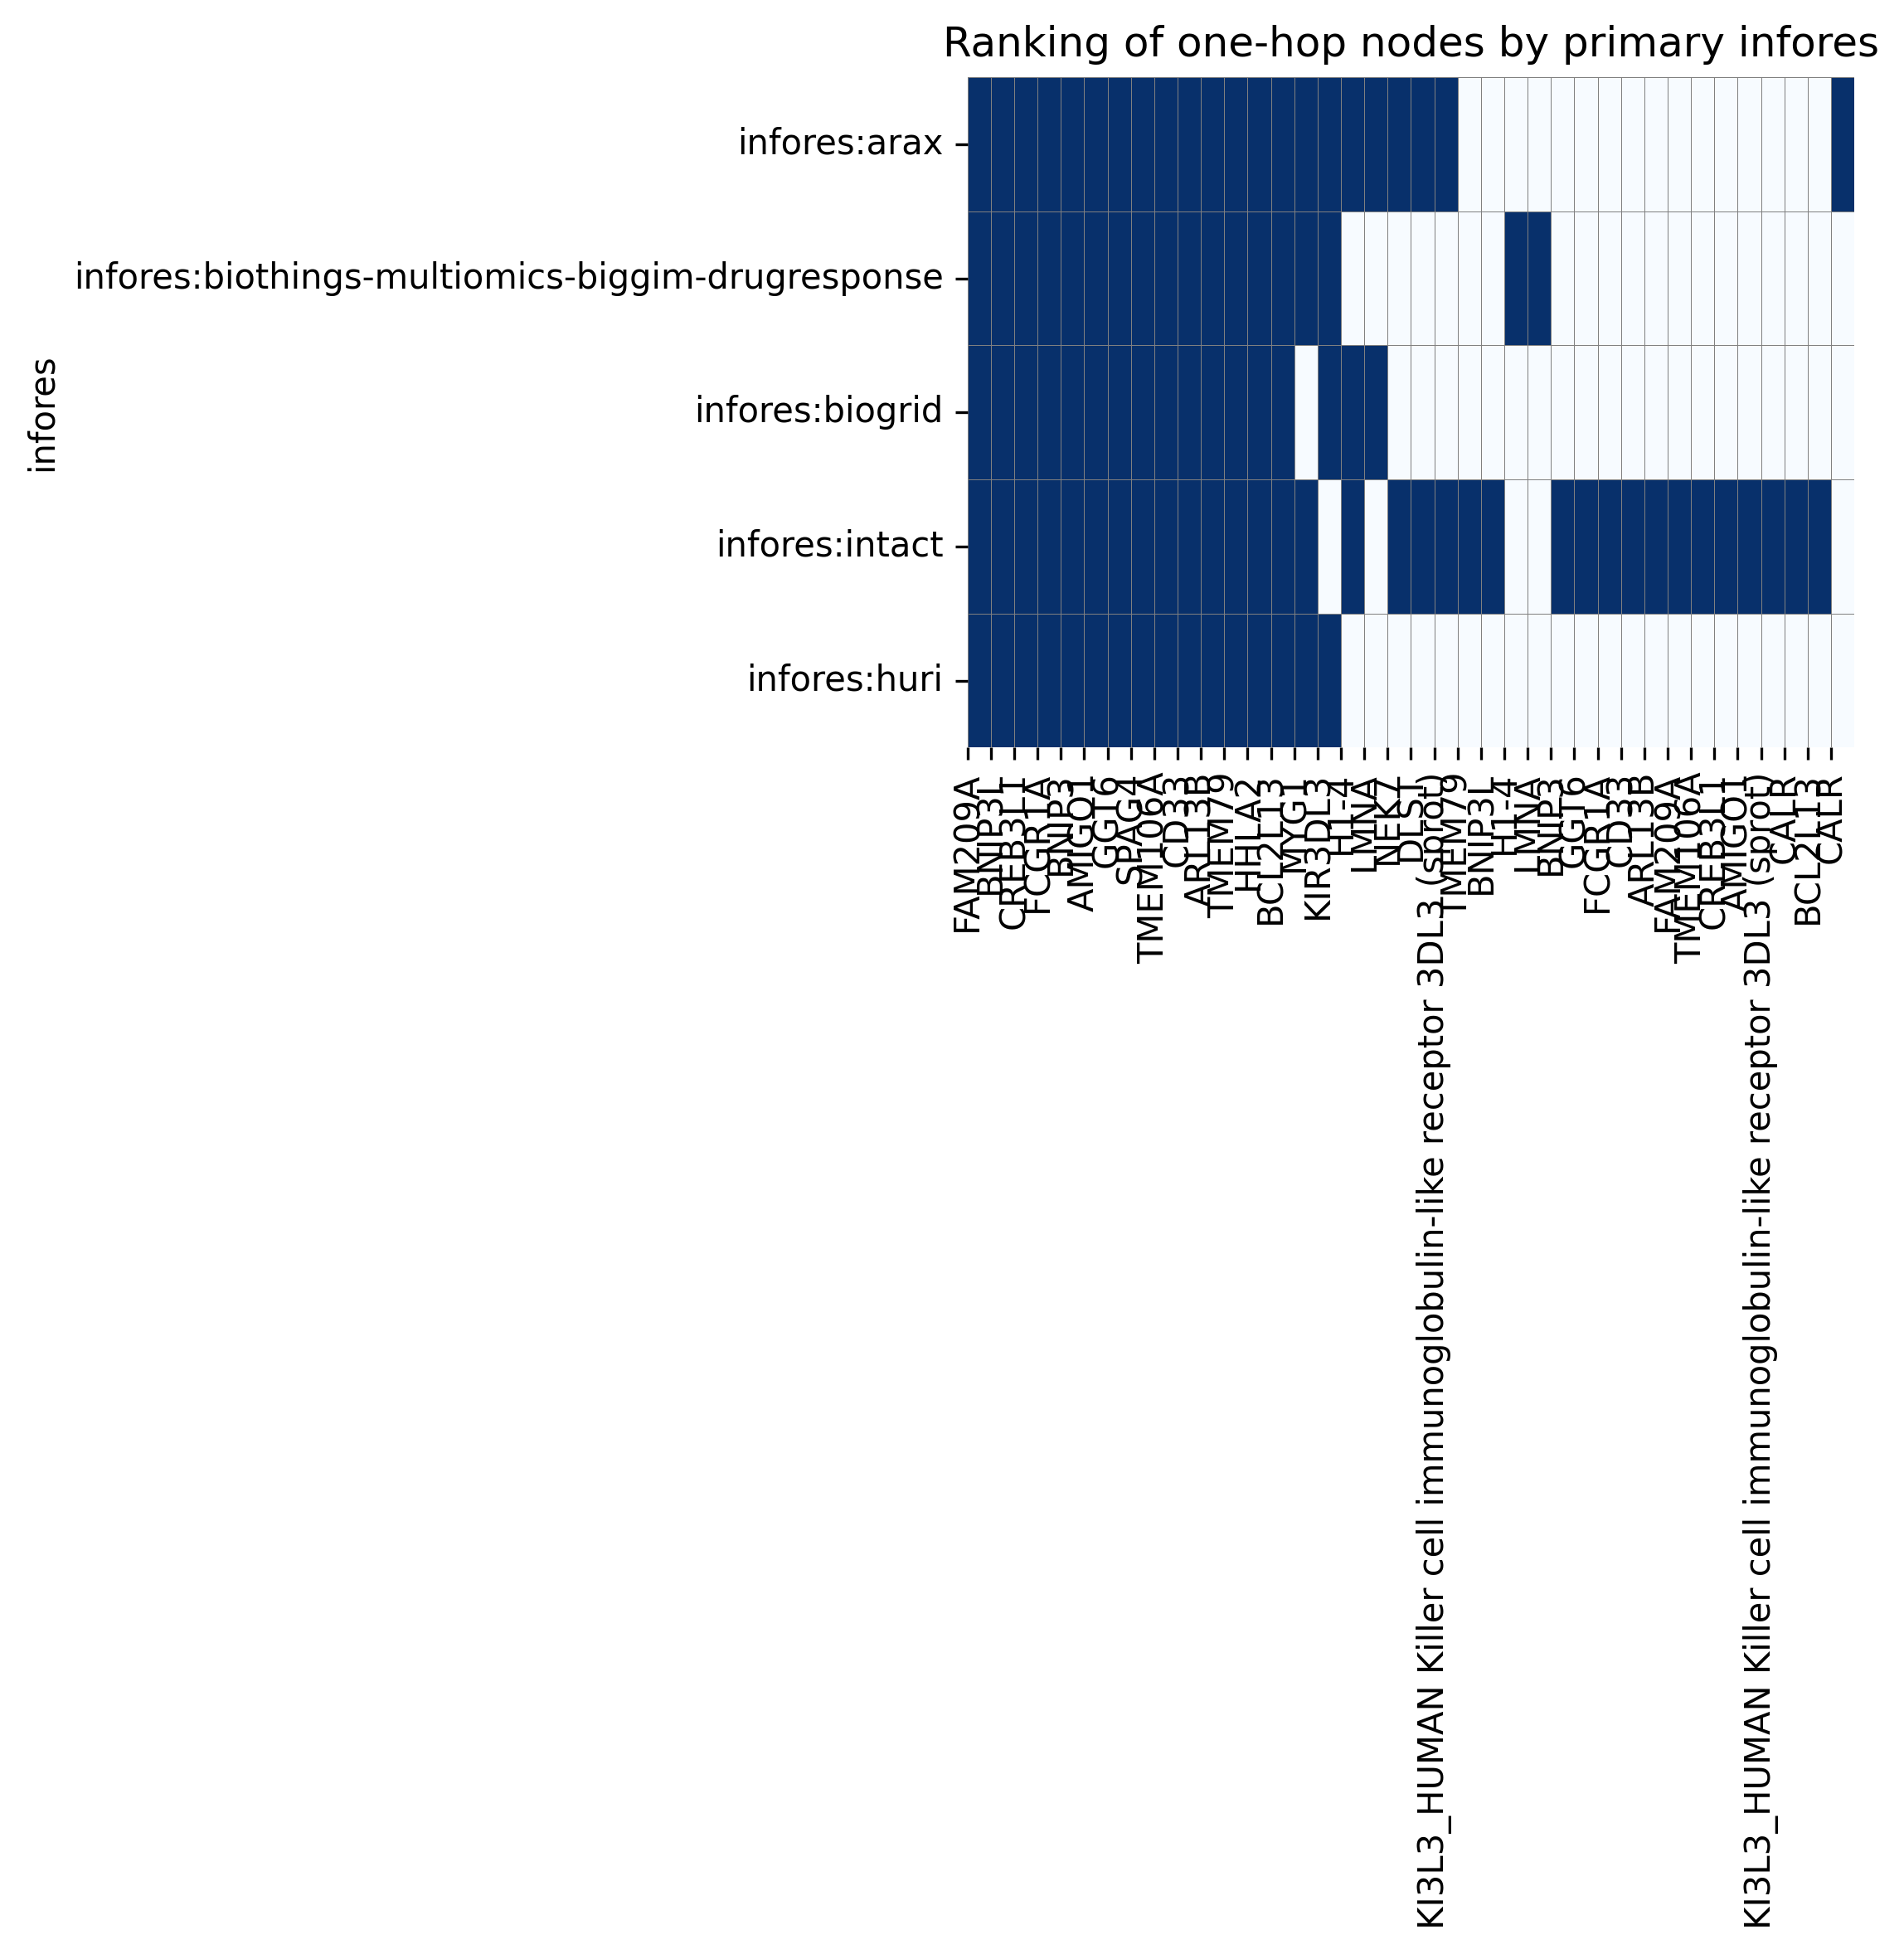

[Text(0.5, 0, 'FAM209A'), Text(2.5, 0, 'CREB3L1'), Text(4.5, 0, 'BNIP3'), Text(6.5, 0, 'GGT6'), Text(8.5, 0, 'TMEM106A'), Text(10.5, 0, 'ARL13B'), Text(12.5, 0, 'HHLA2'), Text(14.5, 0, 'MYG1'), Text(16.5, 0, 'H1-4'), Text(18.5, 0, 'NEK7'), Text(20.5, 0, 'KI3L3_HUMAN Killer cell immunoglobulin-like receptor 3DL3 (sprot)'), Text(22.5, 0, 'BNIP3L'), Text(24.5, 0, 'LMNA'), Text(26.5, 0, 'GGT6'), Text(28.5, 0, 'CD33'), Text(30.5, 0, 'FAM209A'), Text(32.5, 0, 'CREB3L1'), Text(34.5, 0, 'KI3L3_HUMAN Killer cell immunoglobulin-like receptor 3DL3 (sprot)'), Text(36.5, 0, 'BCL2L13')]


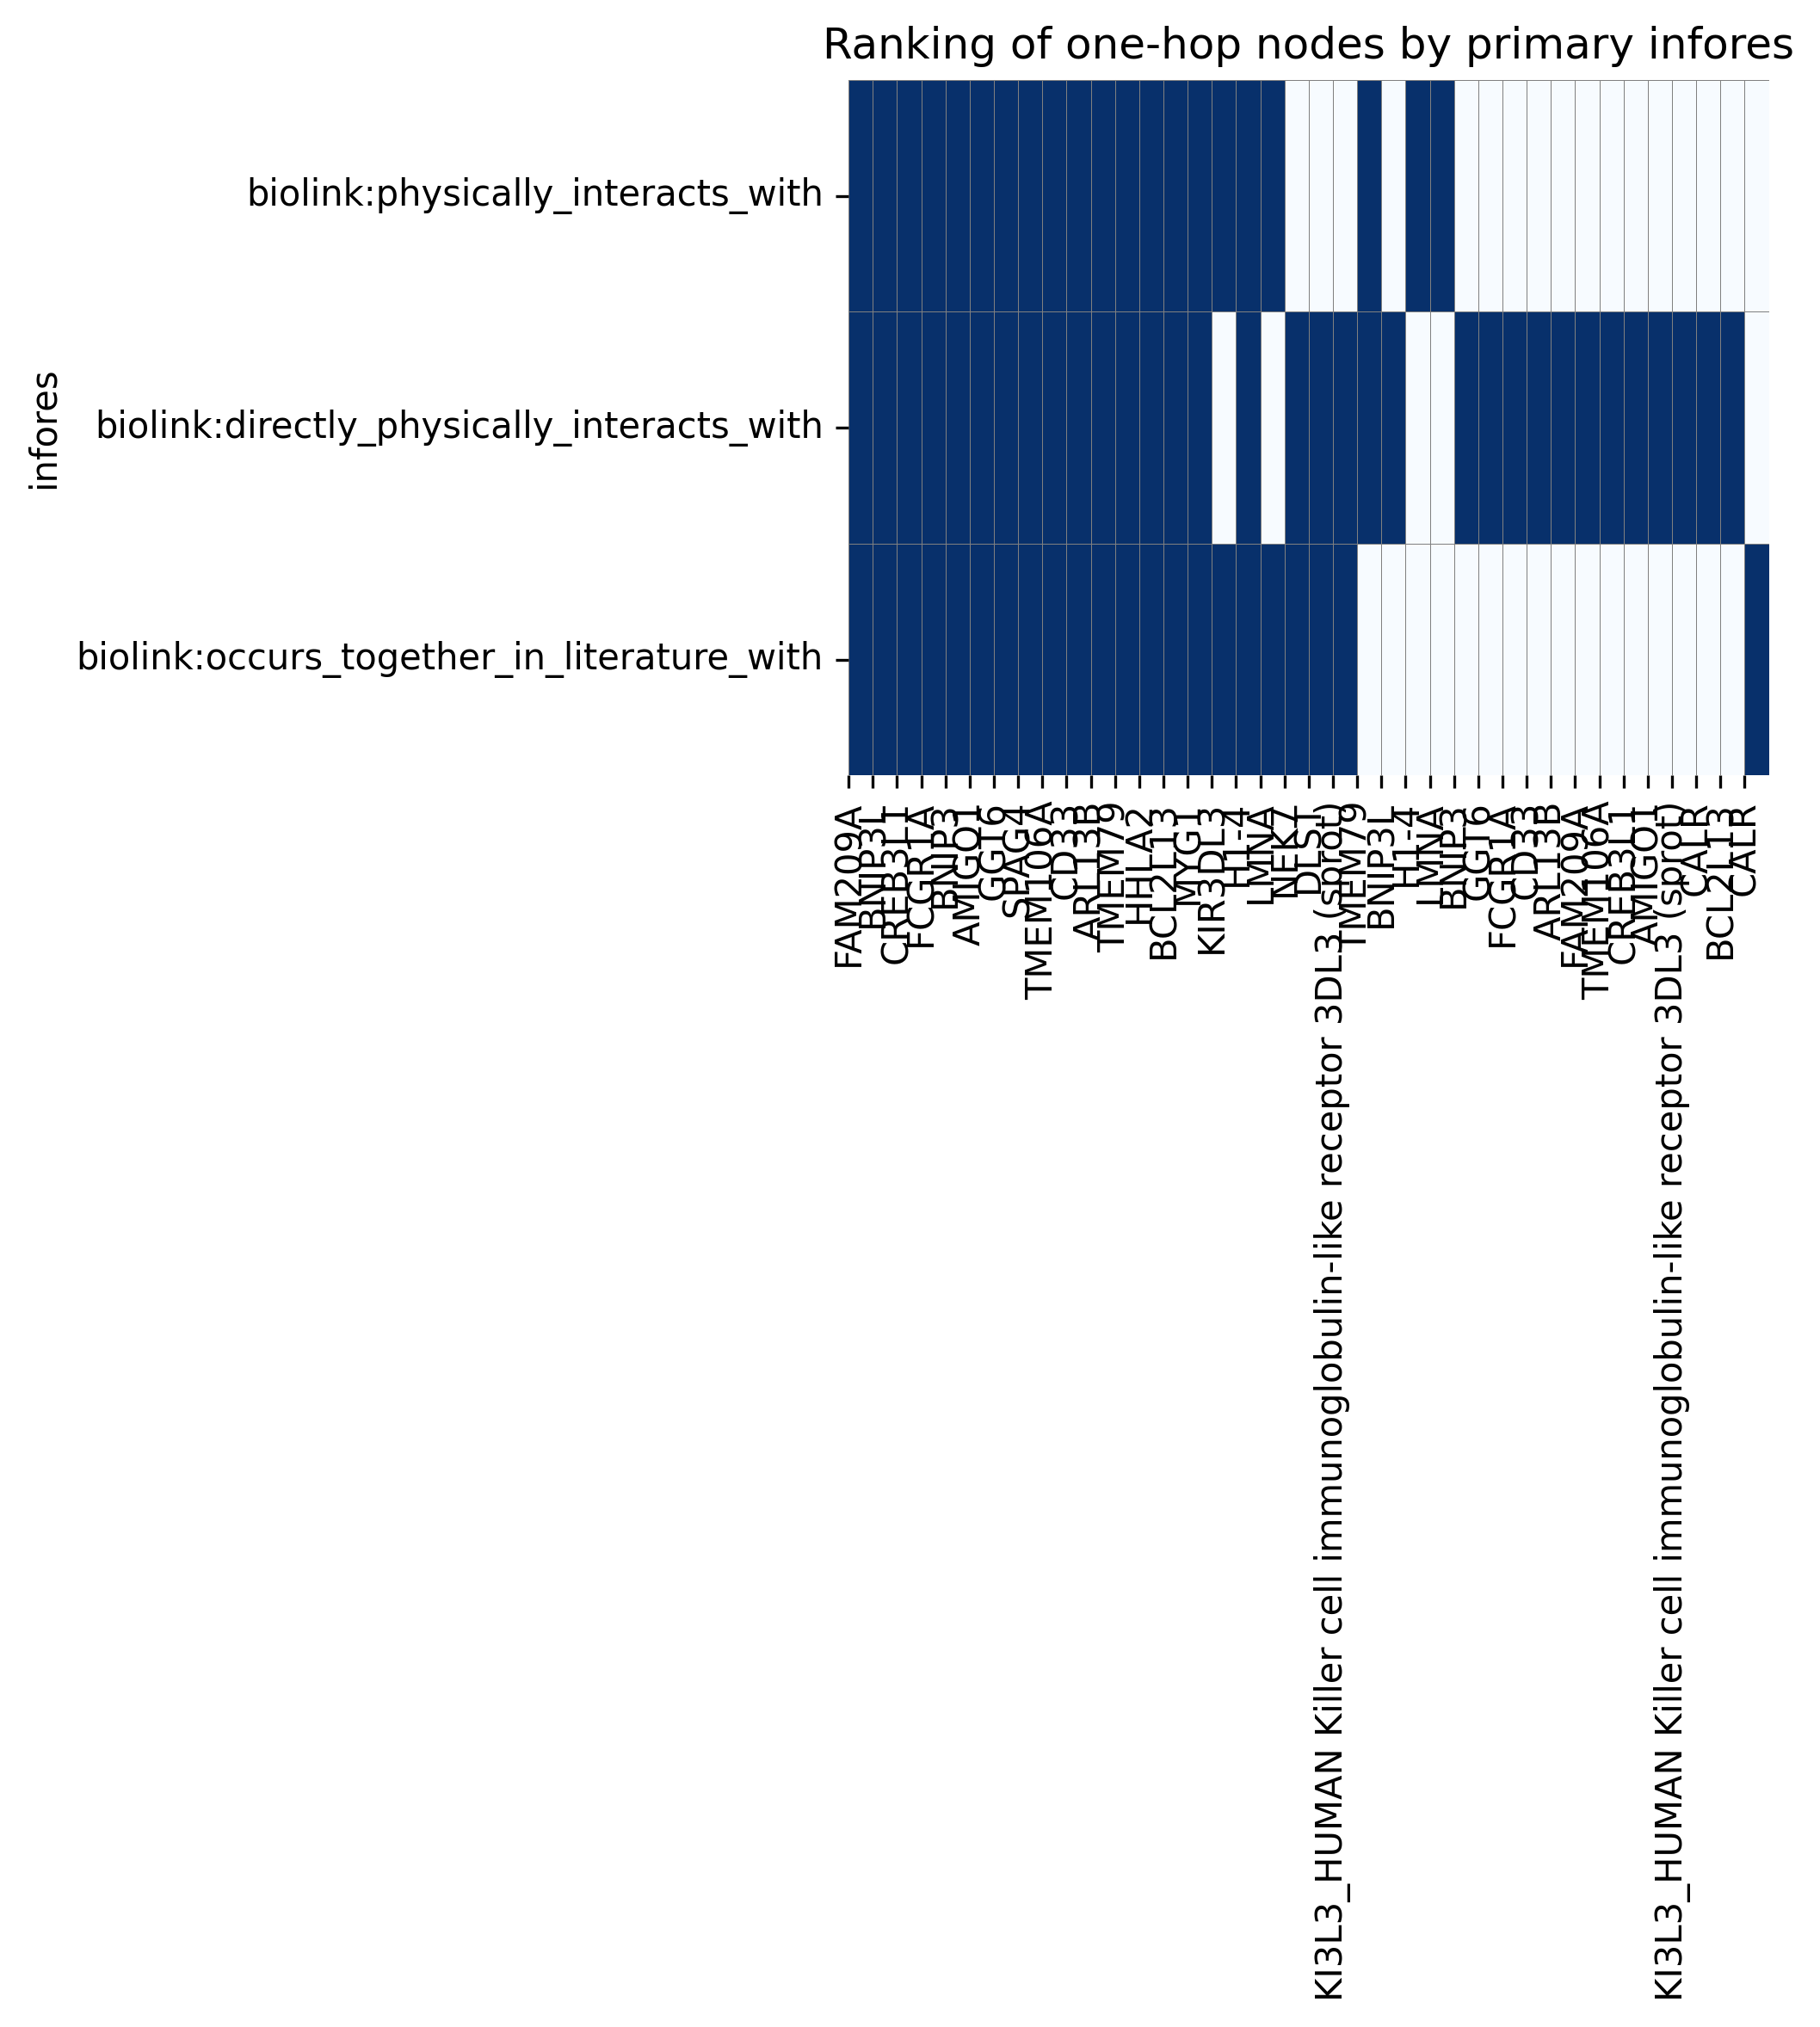

,FAM209A,BNIP3L,CREB3L1,FCGR1A,BNIP3,AMIGO1,GGT6,SPAG4,TMEM106A,CD33,...,CD33,ARL13B,FAM209A,TMEM106A,CREB3L1,AMIGO1,KI3L3_HUMAN Killer cell immunoglobulin-like receptor 3DL3 (sprot),CALR,BCL2L13,CALR
biolink:physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:directly_physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
biolink:occurs_together_in_literature_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, num_of_nodes = 100, input_query = "NCBIGene:64102")

In [ ]:
# End of the example